In [41]:
import numpy as np
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection as model 
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [42]:
boston = datasets.load_boston()

In [43]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [44]:
boston.data.shape

(506, 13)

In [45]:
boston.target.shape

(506,)

In [46]:
linreg = linear_model.LinearRegression()

In [47]:
X_train, X_test, y_train, y_test = model.train_test_split(
    boston.data, boston.target, test_size=0.1,
    random_state=42
)

In [48]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.73948415423661

In [50]:
linreg.score(X_train, y_train)

0.7374934091901197

In [51]:
y_pred = linreg.predict(X_test)

In [52]:
metrics.mean_squared_error(y_test, y_pred)

15.010997321630335

Text(0,0.5,'target value')

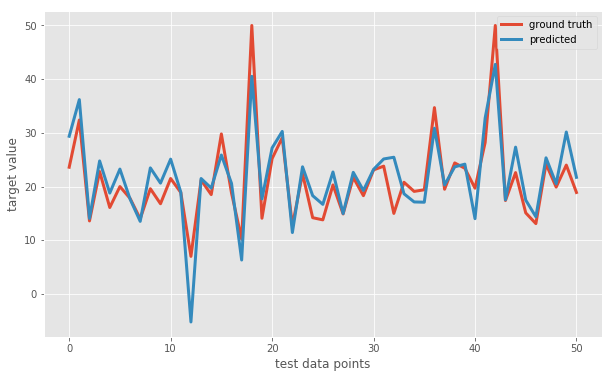

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5,45,'MSE = 15.011')

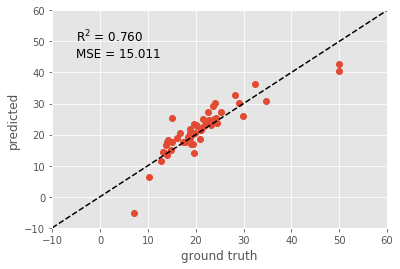

In [54]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60],[-10, 60], 'k--')
plt.axis([-10, 60, -10 ,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f'% metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

In [55]:
linreg = linear_model.LinearRegression()
lassoreg = linear_model.Lasso()
ridgereg = linear_model.Ridge()

In [56]:
def show_reg(_reg, _X_train, _y_train, _X_test, _y_test):
    _reg.fit(_X_train, _y_train)
    metrics.mean_squared_error(_y_train, _reg.predict(_X_train))
    _reg.score(_X_train, _y_train)
    _y_pred = _reg.predict(_X_test)
    metrics.mean_squared_error(_y_test, _y_pred)
    plt.figure(figsize=(10, 6))
    plt.plot(_y_test, linewidth=3, label='ground truth')
    plt.plot(_y_pred, linewidth=3, label='predicted')
    plt.legend(loc='best')
    plt.xlabel('test data points')
    plt.ylabel('target value')
    plt.show()
    plt.plot(_y_test, _y_pred, 'o')
    plt.plot([-10, 60],[-10, 60], 'k--')
    plt.axis([-10, 60, -10 ,60])
    plt.xlabel('ground truth')
    plt.ylabel('predicted')
    scorestr = r'R$^2$ = %.3f' % _reg.score(_X_test, _y_test)
    errstr = 'MSE = %.3f'% metrics.mean_squared_error(_y_test, _y_pred)
    plt.text(-5, 50, scorestr, fontsize=12)
    plt.text(-5, 45, errstr, fontsize=12)
    plt.show()

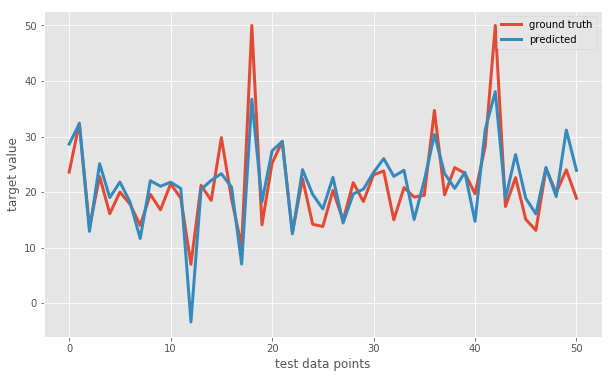

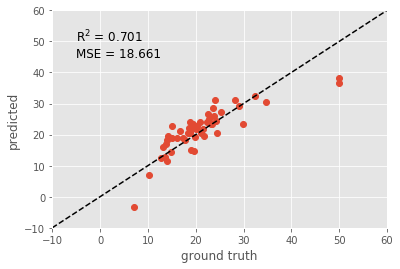

In [57]:
show_reg(lassoreg, X_train, y_train, X_test, y_test)

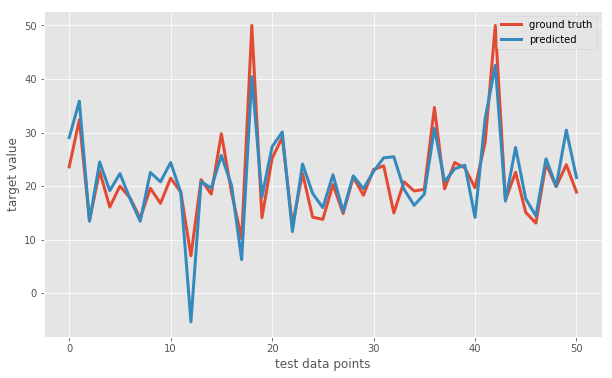

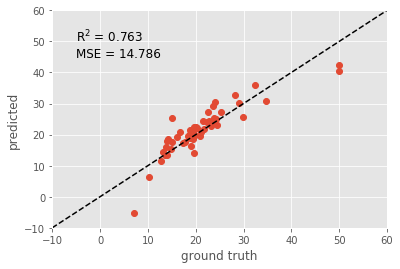

In [58]:
show_reg(ridgereg, X_train, y_train, X_test, y_test)